### Prediction of monthly Henry Hub natural gas spot prices using 4 machine learning algorithms; Support Vector Machines, Random Forest Regression, Gradient Boosting Machine and Artificial Neural Networks

The Henry Hub natural gas price is an important benchmark in the natural gas industry because it is based on the supply and demand of natural gas as an independent commodity unlike other hub prices that create a pricing system considering natural gas as a product of oil and thus indexing its price to oil.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import re
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

The data was gathered independently from the EIA website for the period between January 2001 and November 2021. The features considered were:

Cooling Degree Days
Heating Degree Days
Natural Gas Demand
Natural Gas Imports
Natural Gas Exports
Natural Gas Drilling Rigs Count
Natural Gas Supply
Natural Gas Storage
West Texas Intermediate (WTI) oil price
Heating oil price
USD/EUR exchange rate

In [3]:
df=pd.read_csv('natural_gas_data.csv')
df.head()

,month,cool_days,hot_days,demand,imports,exports,rig_count,supply,storage,wti_price,heating_oil,usd_rate,gas_price
0,2001-01,4.0,928.0,2676998.0,373077.0,25547.0,879.0,1753237.0,5609446.0,29.59,0.845,1.065594,8.17
1,2001-02,14.0,720.0,2309464.0,328289.0,26882.0,898.0,1582557.0,5240820.0,29.61,0.785,1.085974,5.61
2,2001-03,13.0,663.0,2246633.0,358103.0,32121.0,913.0,1766754.0,5041971.0,27.25,0.741,1.100009,5.23
3,2001-04,40.0,311.0,1807170.0,318573.0,23637.0,957.0,1703310.0,5252851.0,27.49,0.782,1.121112,5.19
4,2001-05,117.0,124.0,1522382.0,321878.0,28981.0,997.0,1763141.0,5749464.0,28.63,0.772,1.141182,4.19


In [4]:
df.shape



(251, 13)

In [5]:
df.describe()

,cool_days,hot_days,demand,imports,exports,rig_count,supply,storage,wti_price,heating_oil,usd_rate,gas_price
count,251.000000,251.000000,2.510000e+02,251.000000,251.000000,251.000000,2.510000e+02,2.510000e+02,251.000000,251.000000,251.000000,251.000000
mean,116.840637,351.892430,2.114223e+06,288789.003984,163093.075697,667.804781,2.118770e+06,6.908174e+06,62.443227,1.833048,0.833984,4.436892
std,123.940173,310.865425,4.608949e+05,58537.633529,140154.507369,470.567366,4.984372e+05,8.043990e+05,25.281008,0.761938,0.111220,2.182965
min,3.000000,3.000000,1.368369e+06,174225.000000,23637.000000,70.000000,1.400941e+06,5.041971e+06,16.550000,0.524000,0.634241,1.630000
25%,15.000000,39.500000,1.742105e+06,238303.500000,63901.500000,190.500000,1.692639e+06,6.288917e+06,43.900000,1.304000,0.754329,2.850000
50%,52.000000,284.000000,2.067048e+06,282159.000000,117329.000000,704.000000,1.984174e+06,7.004573e+06,59.270000,1.804000,0.821033,3.840000
75%,220.500000,629.000000,2.400512e+06,334006.500000,198450.500000,989.500000,2.417350e+06,7.543381e+06,81.340000,2.251000,0.891302,5.660000
max,404.000000,969.000000,3.424302e+06,426534.000000,595411.000000,1585.000000,3.234746e+06,8.384087e+06,133.880000,3.801000,1.171584,13.420000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month        251 non-null    object 
 1   cool_days    251 non-null    float64
 2   hot_days     251 non-null    float64
 3   demand       251 non-null    float64
 4   imports      251 non-null    float64
 5   exports      251 non-null    float64
 6   rig_count    251 non-null    float64
 7   supply       251 non-null    float64
 8   storage      251 non-null    float64
 9   wti_price    251 non-null    float64
 10  heating_oil  251 non-null    float64
 11  usd_rate     251 non-null    float64
 12  gas_price    251 non-null    float64
dtypes: float64(12), object(1)
memory usage: 25.6+ KB


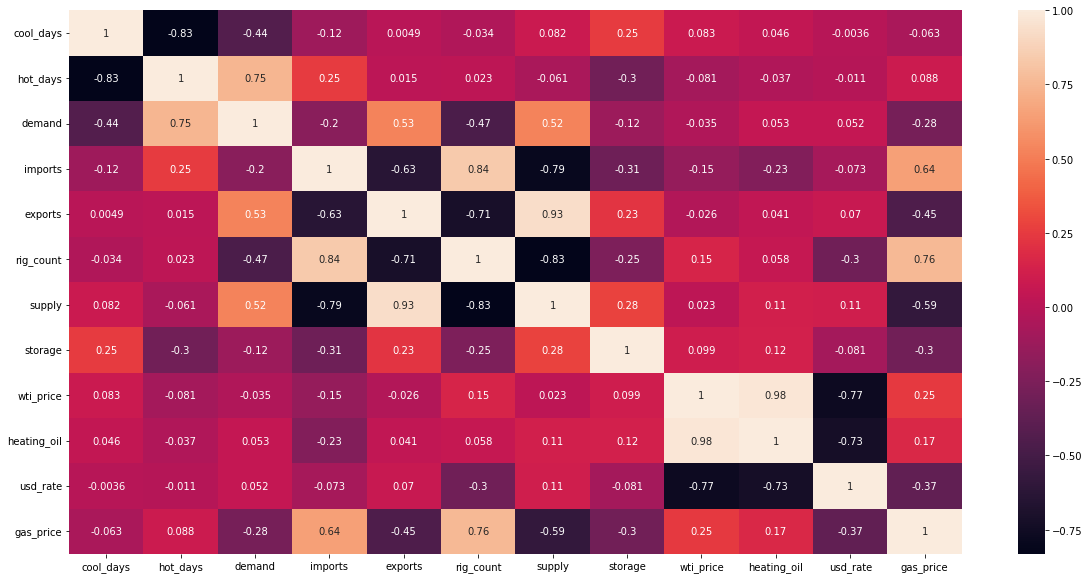

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

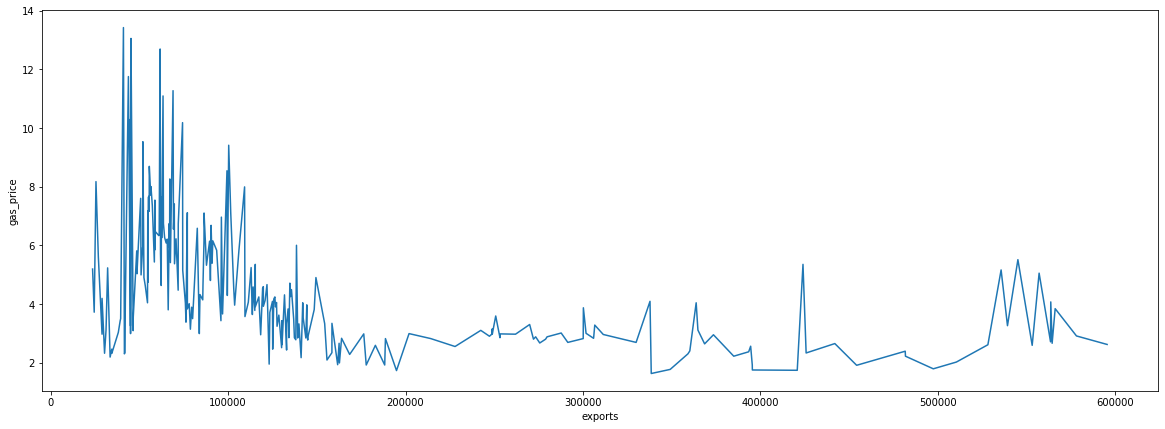

In [19]:
def graph(a,b):
    plt.figure(figsize=(20,7))
    sns.lineplot(x=a, y=b)
    plt.show()

graph(df['exports'], df['gas_price'])

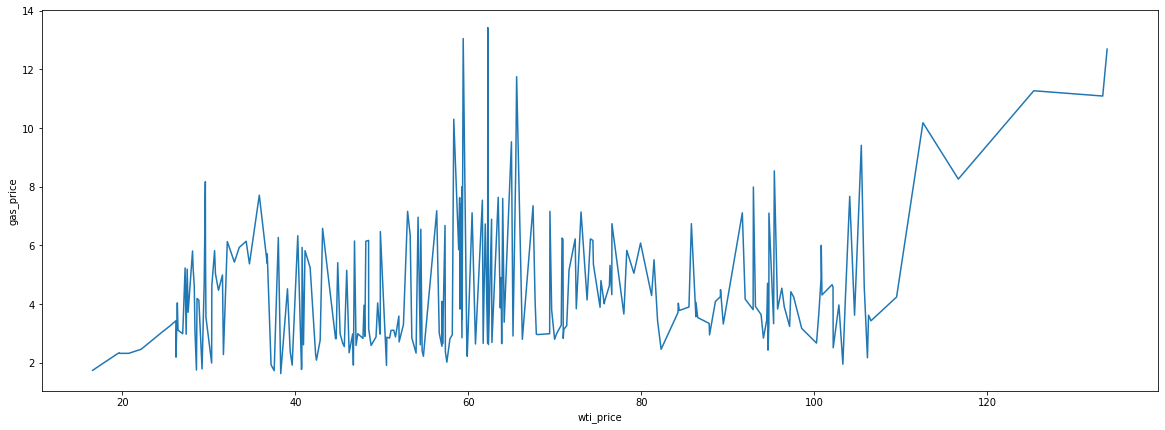

In [14]:
graph(df['wti_price'], df['gas_price'])

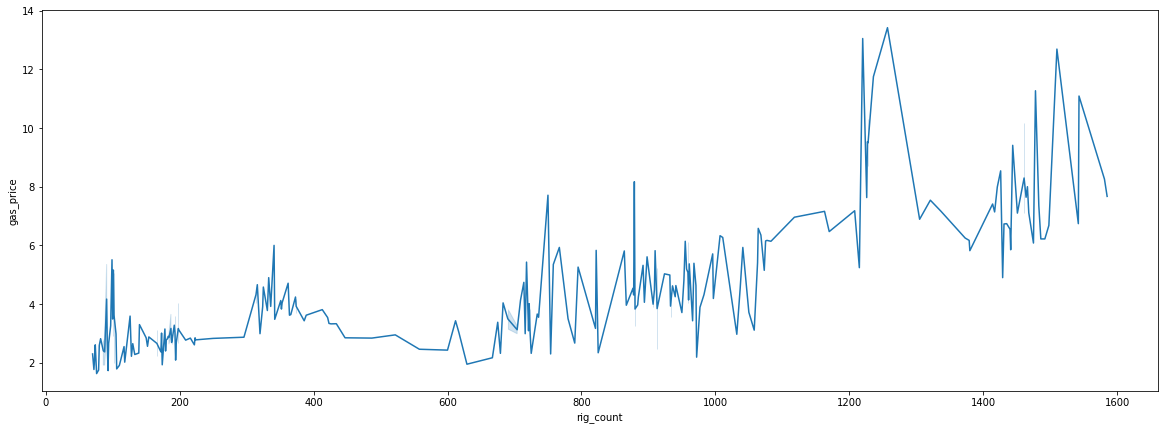

In [15]:
graph(df['rig_count'], df['gas_price'])

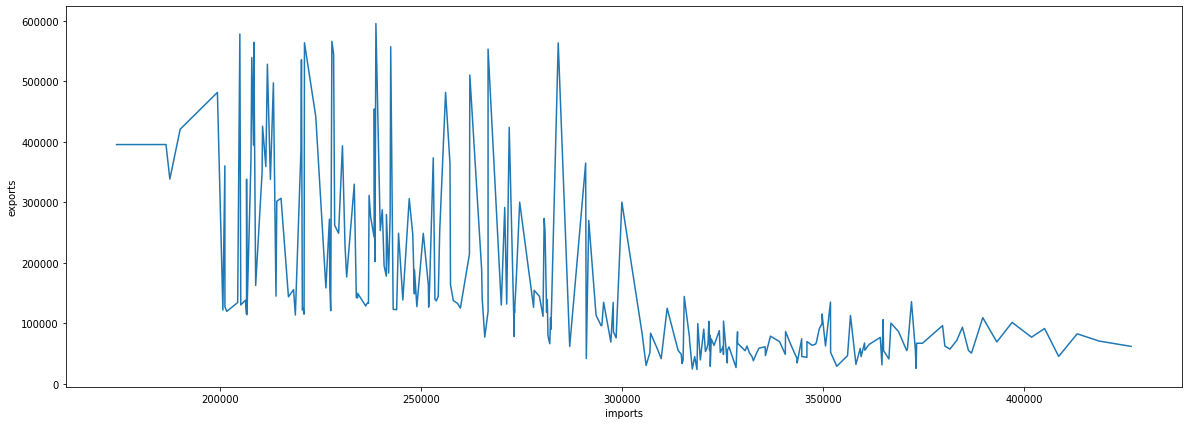

In [16]:
graph(df['imports'], df['exports'])

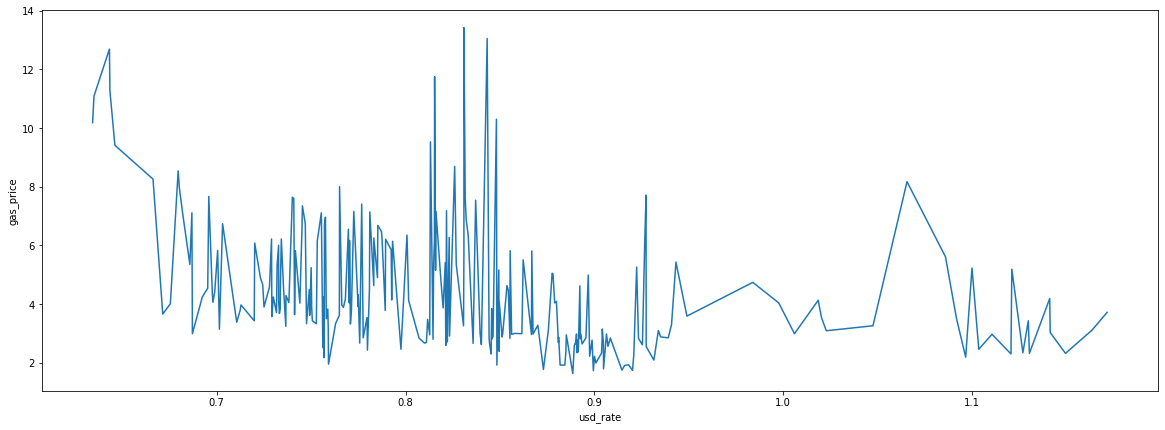

In [18]:
graph(df['usd_rate'], df['gas_price'])

In [21]:
def get_preds(y_test, y_preds):
    y_test=pd.DataFrame(y_test)
    y_test.rename(columns={0:'Actual'}, inplace=True)
    y_preds=pd.DataFrame(y_preds)
    y_preds.rename(columns={0:'Predicted'}, inplace=True)
    predictions=pd.concat([y_test, y_preds], axis=1)
    return predictions

In [31]:
X=df.iloc[:, 1:-1].values
y=df.iloc[:, -1].values
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score,KFold, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [25]:
X1=df.iloc[:, 1:-1].values
y1=df.iloc[:, -1].values.reshape(-1,1)
X_train1, X_test1, y_train1, y_test1= train_test_split(X1, y1, test_size=0.2, random_state=42)
sc=StandardScaler()
X_train1=sc.fit_transform(X_train1)
X_test1=sc.transform(X_test1)
sc_y=StandardScaler()
y_train1=sc_y.fit_transform(y_train1)
y_test1=sc_y.transform(y_test1)

## SUPPORT VECTOR REGRESSOR

In [26]:
reg_sv=SVR()
p_grid={'C':[ 1000, 10000,100000], 'kernel':['rbf', 'poly']}
search=GridSearchCV(estimator=reg_sv, param_grid=p_grid)
search.fit(X_train1, y_train1.ravel())
sv_preds=search.best_estimator_
y_preds=sv_preds.predict(X_test1)
print('The RMSE score for the SVR model is', np.sqrt(mean_squared_error(y_test1, y_preds)))


The RMSE score for the SVR model is 0.3824840968344997


Use a 10-fold cross validation technique for model validation. A decision to run the process 30 times was taken to further study the RMSE value in as many random cases as possible.

In [27]:
for i in range(30):
  outer_cv=KFold(n_splits=10, shuffle= True)
  scores = cross_val_score(sv_preds, X_train1, y_train1.ravel(), scoring='neg_root_mean_squared_error', cv=outer_cv)
  print(np.mean(scores))

-0.3899530686248384
-0.3631918721844082
-0.39379755986989534
-0.3898654843977824
-0.40905057699516423
-0.3765512211529055
-0.3579447236947753
-0.3801423950739567
-0.3859557371203277
-0.3835732708641425
-0.3900643871869916
-0.36988449015167457
-0.38171953842046086
-0.3656678165107909
-0.3798705953361784
-0.3722012814236065
-0.38212625216990387
-0.38157818194888293
-0.38011670741404474
-0.3570272134689928
-0.39259801134863714
-0.3762239498933063
-0.3874178523335231
-0.3680457407957105
-0.39541003658933227
-0.3613914767870793
-0.37923483692220267
-0.39142023369220713
-0.3810404749755022
-0.3790702219854226


In [28]:
y_test2 = sc_y.inverse_transform(y_test1)
pre1 = sc_y.inverse_transform(y_preds.reshape(-1,1))
svr_predictions=get_preds(y_test2, pre1)
svr_predictions

,Actual,Predicted
0,4.24,3.462038
1,3.11,2.866313
2,3.92,3.807978
3,8.69,7.909211
4,4.80,5.066917
5,1.73,1.764678
6,2.98,2.964551
7,5.16,4.231195
8,2.46,2.342300
9,3.71,3.957812


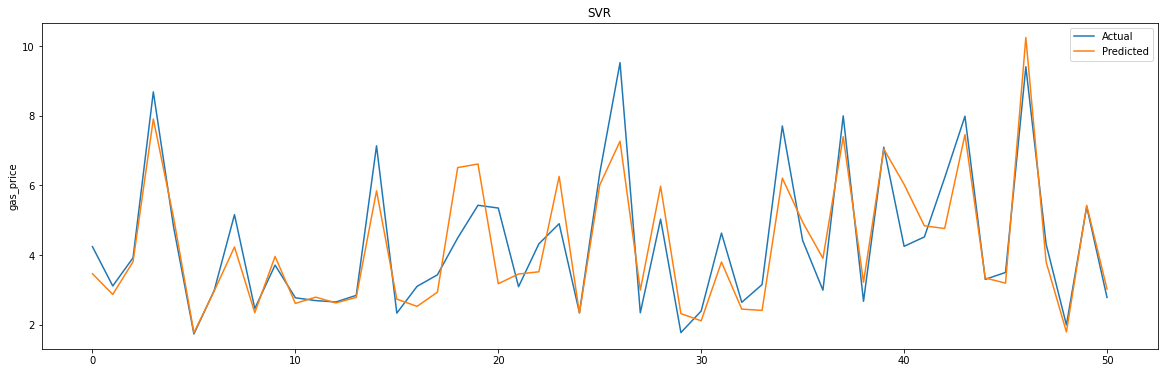

In [29]:
plt.figure(figsize=(20,6))
plt.plot(svr_predictions['Actual'])
plt.plot(svr_predictions['Predicted'])
plt.ylabel('gas_price')
plt.legend(['Actual', 'Predicted'], loc='best')
plt.title('SVR')
plt.show()

## Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
print('The RMSE score for the RFR model is', np.sqrt(mean_squared_error(y_test, y_pred)))

The RMSE score for the RFR model is 1.0761731981205174


In [37]:
for i in range(30):
    outer_cv=KFold(n_splits=10, shuffle= True)
    scores = cross_val_score(rf, X, y, scoring='neg_root_mean_squared_error', cv=outer_cv)
    print(np.mean(scores))

-0.8412732896154702
-0.9167245508469672
-0.9277452226731432
-0.868892316131783
-0.8276638018471608
-0.8421893010028214
-0.8379670995741726
-0.8533952777653975
-0.8368711657725226
-0.8714969174591065
-0.8135931176131658
-0.8690100148420783
-0.8833780446016103
-0.8620498049845459
-0.8481417488290119
-0.8566033887047485
-0.8275758739840342
-0.8751427537353257
-0.8374288515100862
-0.8798938567150498
-0.8128431433714404
-0.8509091515314324
-0.8590453867971306
-0.825862724134111
-0.8880975916007646
-0.8295981974564048
-0.8797246992253903
-0.8722941387303356
-0.8330289559983513
-0.8381376650041314


In [38]:
rf_predictions=get_preds(y_test, y_pred)
rf_predictions

,Actual,Predicted
0,4.24,3.9792
1,3.11,6.8720
2,3.92,3.7985
3,8.69,7.3803
4,4.80,3.9005
5,1.73,2.0336
6,2.98,2.8906
7,5.16,3.3607
8,2.46,3.8431
9,3.71,3.6757


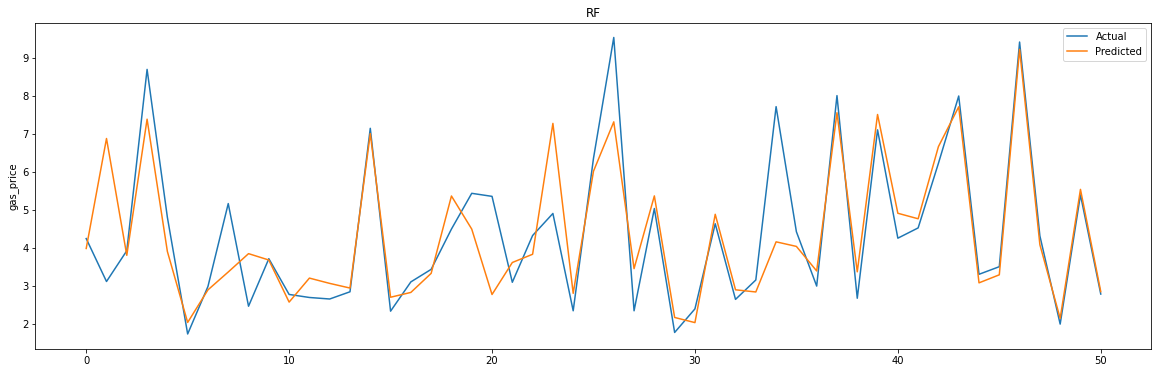

In [39]:
plt.figure(figsize=(20,6))
plt.plot(rf_predictions['Actual'])
plt.plot(rf_predictions['Predicted'])
plt.ylabel('gas_price')
#plt.xlabel('Predicted')
plt.legend(['Actual', 'Predicted'], loc='best')
plt.title('RF')
plt.show()

## GRADIENT BOOSTING

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_pred=gb.predict(X_test)
print('The RMSE score for the GBR model is', np.sqrt(mean_squared_error(y_test, gb_pred)))

The RMSE score for the GBR model is 0.8542031857216161


In [44]:
for i in range(20):
    outer_cv=KFold(n_splits=10, shuffle= True)
    scores = cross_val_score(gb, X, y, scoring='neg_root_mean_squared_error', cv=outer_cv)
    print(np.mean(scores))

-0.8453644698552336
-0.8067374967359449
-0.8301994739678209
-0.8617783426195572
-0.8374824241809907
-0.7798241082376925
-0.8091666462174647
-0.8249526084096779
-0.8308310627652704
-0.8301807806175553
-0.8788648410474897
-0.8260090779367106
-0.833090290263469
-0.8238229801025811
-0.8053791946798524
-0.8712123887169826
-0.8396768102520367
-0.8004580649729925
-0.802228397734732
-0.814730301088416


In [42]:
gbr_predictions=get_preds(y_test, gb_pred)
gbr_predictions

,Actual,Predicted
0,4.24,4.008750
1,3.11,3.938106
2,3.92,3.753718
3,8.69,7.842604
4,4.80,3.982835
5,1.73,2.118093
6,2.98,2.950029
7,5.16,3.553646
8,2.46,3.136143
9,3.71,3.837725


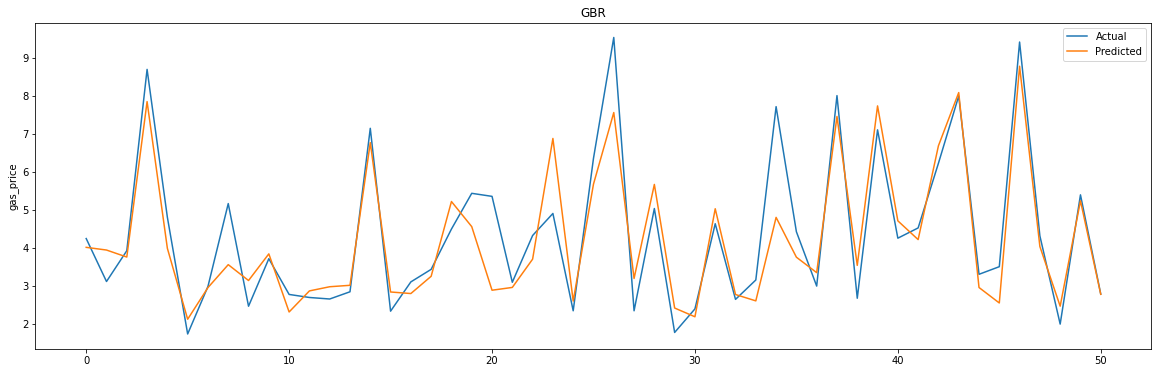

In [45]:
plt.figure(figsize=(20,6))
plt.plot(gbr_predictions['Actual'])
plt.plot(gbr_predictions['Predicted'])
plt.ylabel('gas_price')
plt.legend(['Actual', 'Predicted'], loc='best')
plt.title('GBR')
plt.show()

## Artificial Neural Network

In [46]:
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasRegressor
tf.__version__

'2.7.0'

In [47]:
ann=tf.keras.models.Sequential()

2022-04-27 14:36:58.057453: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Using a 3 hidden layer neural network with 256 units alongside the rectified linear activation function

In [49]:
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [50]:
ann.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])


In [51]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

model validation to check for overfitting 

In [53]:
history=ann.fit(X_train1, y_train1, batch_size=32, epochs=300, validation_data=(X_train1, y_train1), callbacks=[callback])

Epoch 1/300
7/7 [==============================] - 1s 24ms/step - loss: 0.6072 - mean_squared_error: 0.6072 - val_loss: 0.5007 - val_mean_squared_error: 0.5007
Epoch 2/300
7/7 [==============================] - 0s 7ms/step - loss: 0.3825 - mean_squared_error: 0.3825 - val_loss: 0.3178 - val_mean_squared_error: 0.3178
Epoch 3/300
7/7 [==============================] - 0s 7ms/step - loss: 0.2767 - mean_squared_error: 0.2767 - val_loss: 0.2087 - val_mean_squared_error: 0.2087
Epoch 4/300
7/7 [==============================] - 0s 6ms/step - loss: 0.1947 - mean_squared_error: 0.1947 - val_loss: 0.1648 - val_mean_squared_error: 0.1648
Epoch 5/300
7/7 [==============================] - 0s 6ms/step - loss: 0.1971 - mean_squared_error: 0.1971 - val_loss: 0.1722 - val_mean_squared_error: 0.1722
Epoch 6/300
7/7 [==============================] - 0s 7ms/step - loss: 0.1549 - mean_squared_error: 0.1549 - val_loss: 0.1495 - val_mean_squared_error: 0.1495
Epoch 7/300
7/7 [============================

In [57]:
ann_preds=ann.predict(X_test1)
mse = tf.keras.losses.MeanSquaredError()
ann_mse=mse(y_test1, ann_preds).numpy()
ann_mse

0.13051374

In [58]:
print('The RMSE score for the ANN model is', np.sqrt(ann_mse))

The RMSE score for the ANN model is 0.36126685


A plot showing the drop in the loss between the training and validation sets through the epochs

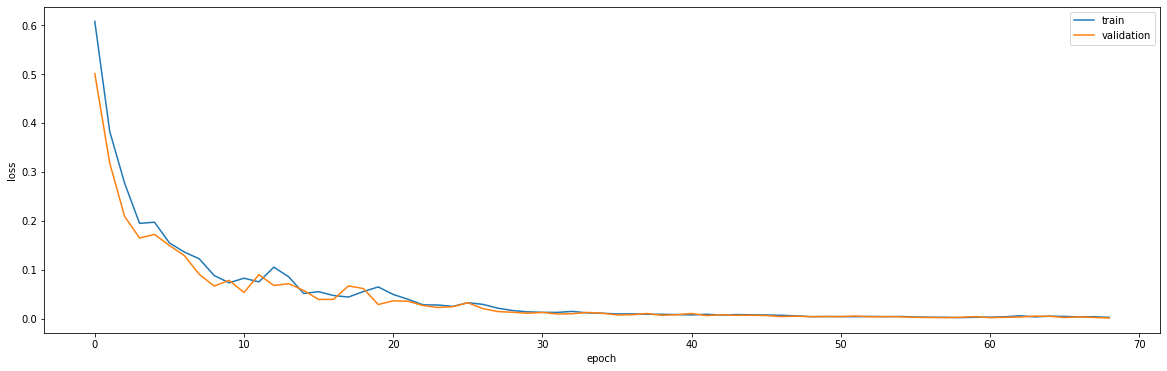

In [59]:
plt.figure(figsize=(20,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

In [60]:
y_new= sc_y.inverse_transform(y_test1)
ann_inverse = sc_y.inverse_transform(ann_preds)
ann_predictions=get_preds(y_new, ann_inverse)
ann_predictions

,Actual,Predicted
0,4.24,3.442426
1,3.11,3.224065
2,3.92,3.821298
3,8.69,9.418591
4,4.80,4.518339
5,1.73,2.086909
6,2.98,2.958094
7,5.16,4.247049
8,2.46,2.598403
9,3.71,3.882467


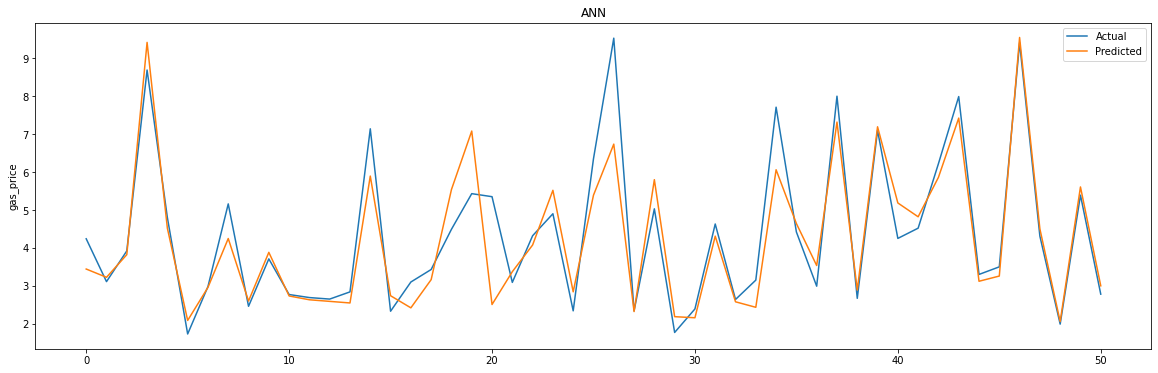

In [61]:
plt.figure(figsize=(20,6))
plt.plot(ann_predictions['Actual'])
plt.plot(ann_predictions['Predicted'])
plt.ylabel('gas_price')
plt.legend(['Actual', 'Predicted'], loc='best')
plt.title('ANN')
plt.show()